In [48]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

### Top 50 spotify 2019

https://www.kaggle.com/datasets/leonardopena/top50spotify2019

In [15]:
df = pd.read_csv('top50.csv', encoding='latin-1', index_col=0)
df.head(10)

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [19]:
df.dtypes

Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object

* **Beats.Per.Minute**: La velocidad o el ritmo de una pieza dada.
* **Energy**: Medida porcentual de intensidad y actividad. Las pistas enérgicas se sienten rápidas, fuertes y ruidosas
* **Danceability**: Describe qué tan adecuada es una pista para bailar en función de los atributos musicales, incluidos el tempo, el ritmo, la estabilidad, la fuerza del compás y la regularidad general.
* **Loudness..dB..**: El volumen promedio en toda una pista.
* **Liveness**: Detecta la presencia de una audiencia en la grabación.
* **Valence**:Describe la positividad musical transmitida por una pista. Las pistas con una valencia alta suenan más positivas.
* **Length**:Duración
* **Acousticness**: Medida de confianza de si la pista es acústica.
* **Speechiness**: Detecta la presencia de palabras habladas en una pista (los valores por encima de 0,66 describen pistas que probablemente estén compuestas en su totalidad por palabras habladas, 0,33–0,66 describen pistas que pueden contener música y voz, y los valores por debajo de 0,33 probablemente representan música y otros elementos que no son de voz). -como pistas).

In [52]:
df_X=df.iloc[:, 3:-1]
df_X.head()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.
1,117,55,76,-6,8,75,191,4,3
2,105,81,79,-4,8,61,302,8,9
3,190,80,40,-4,16,70,186,12,46
4,93,65,64,-8,8,55,198,12,19
5,150,65,58,-4,11,18,175,45,7


<AxesSubplot:>

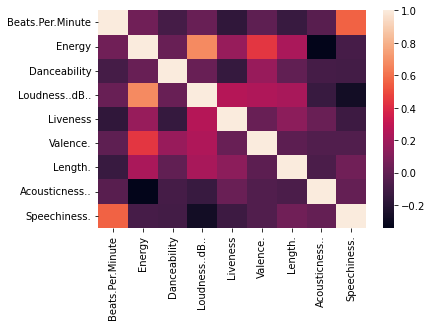

In [53]:
sns.heatmap(X_std.corr())

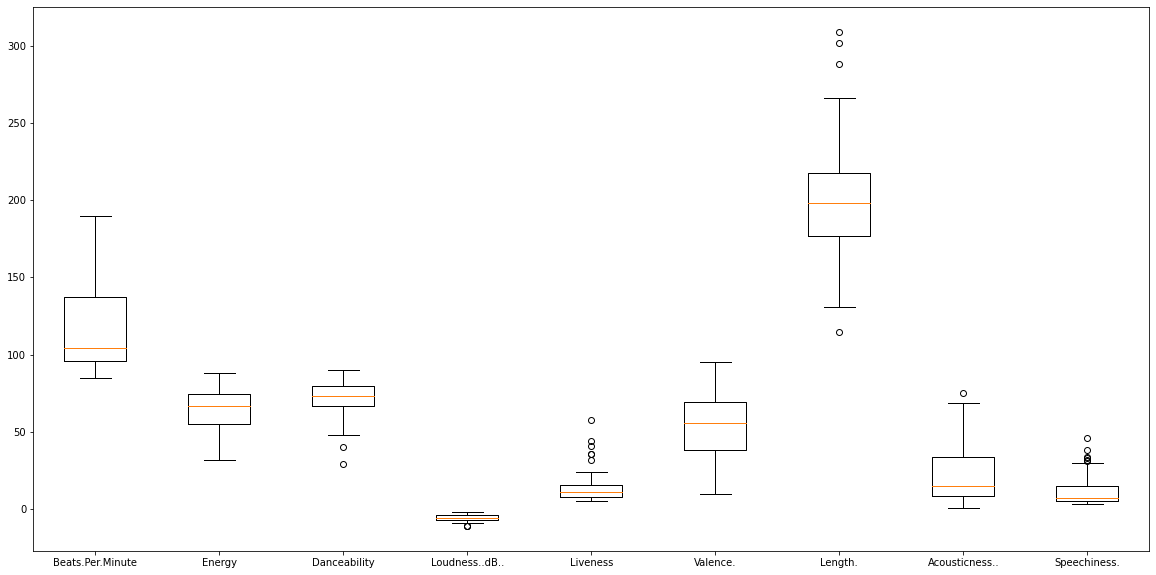

In [94]:
fig = plt.figure(figsize =(20, 10))
plt.boxplot(df_X, labels=df_X.columns)
plt.show()

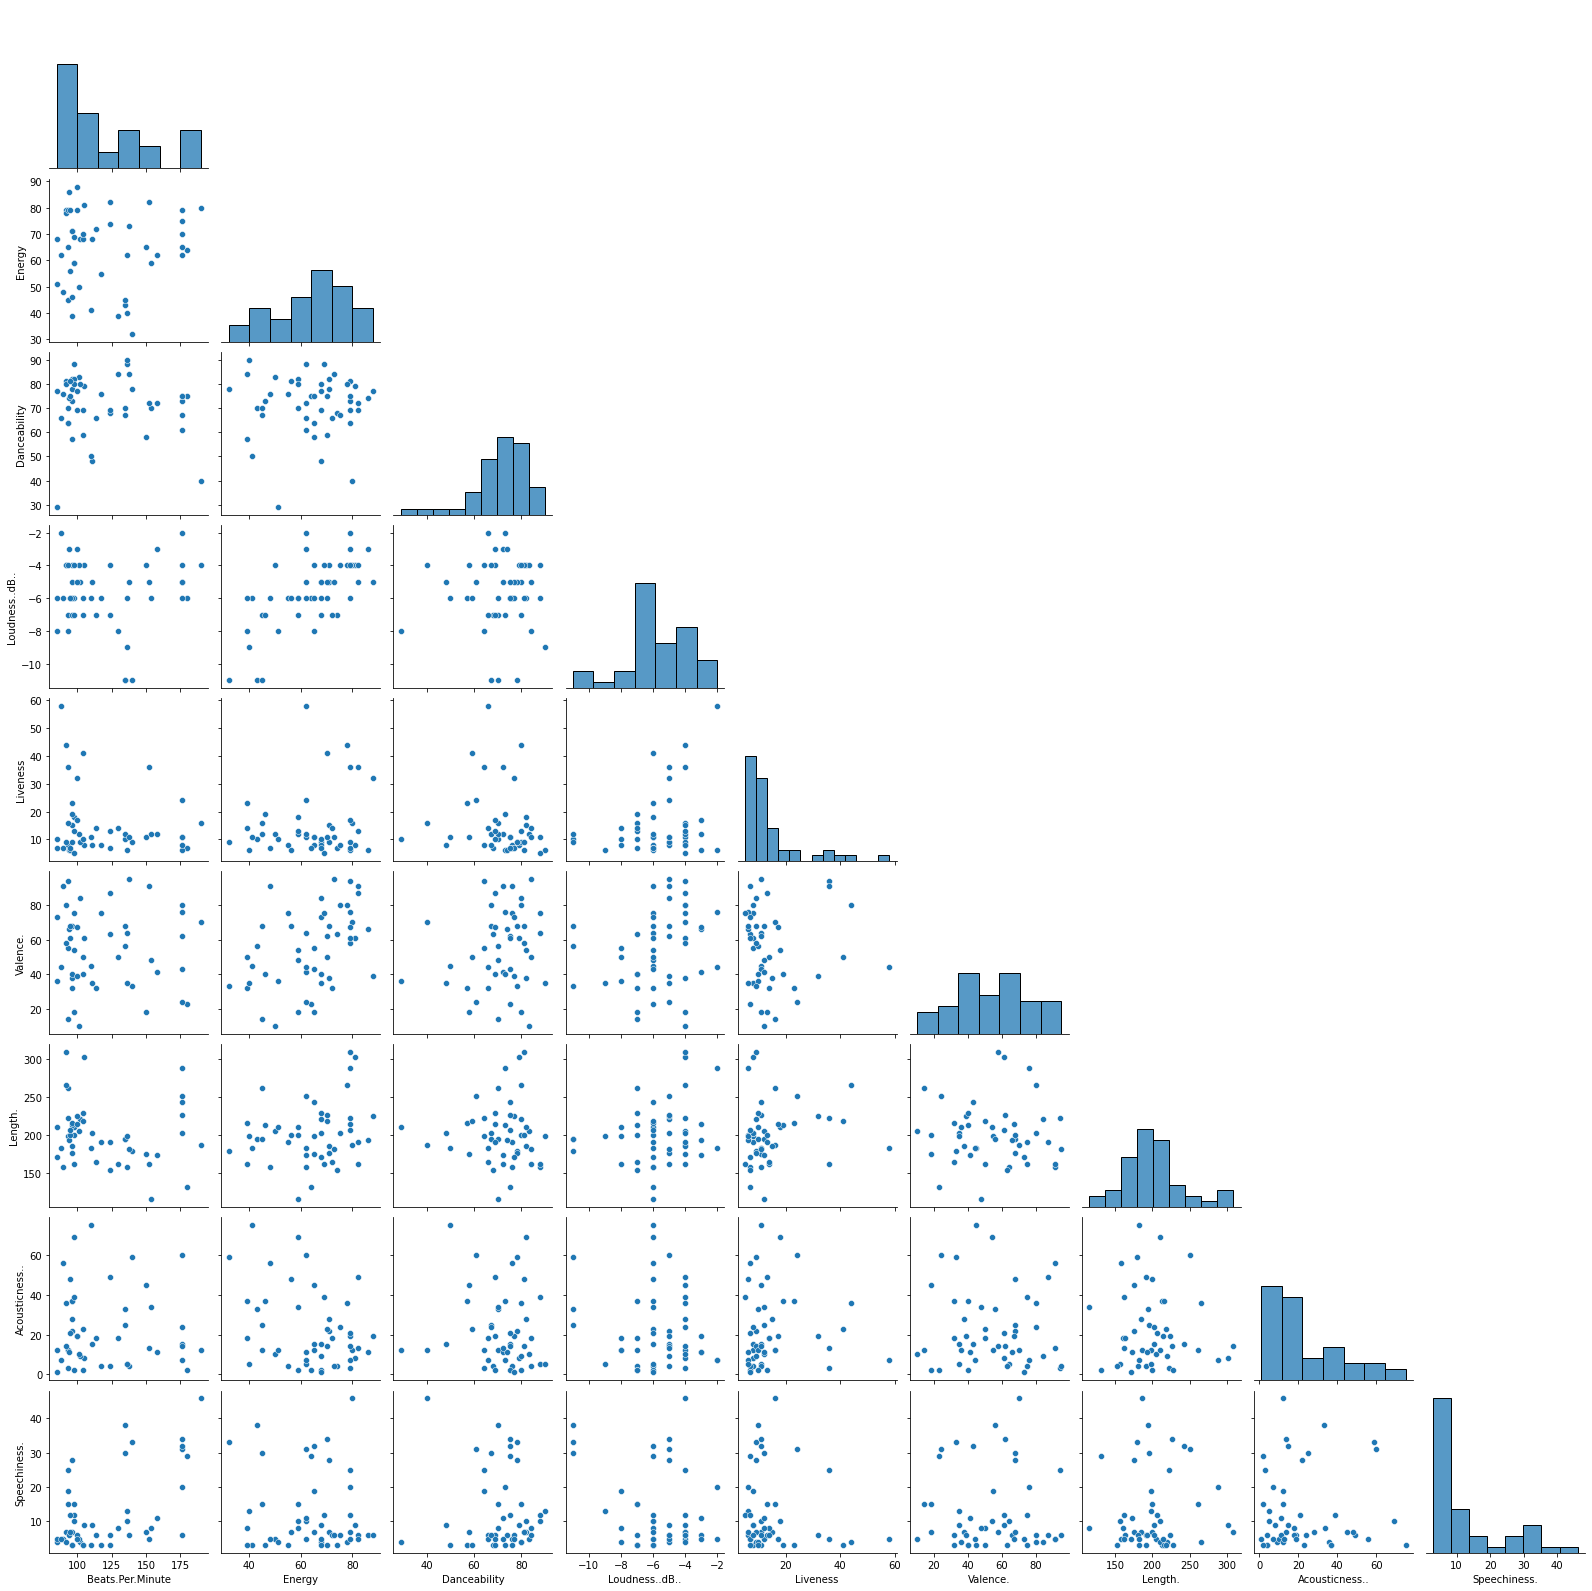

In [97]:
sns.pairplot(df_X, corner=True)
plt.show()

In [54]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df_X)

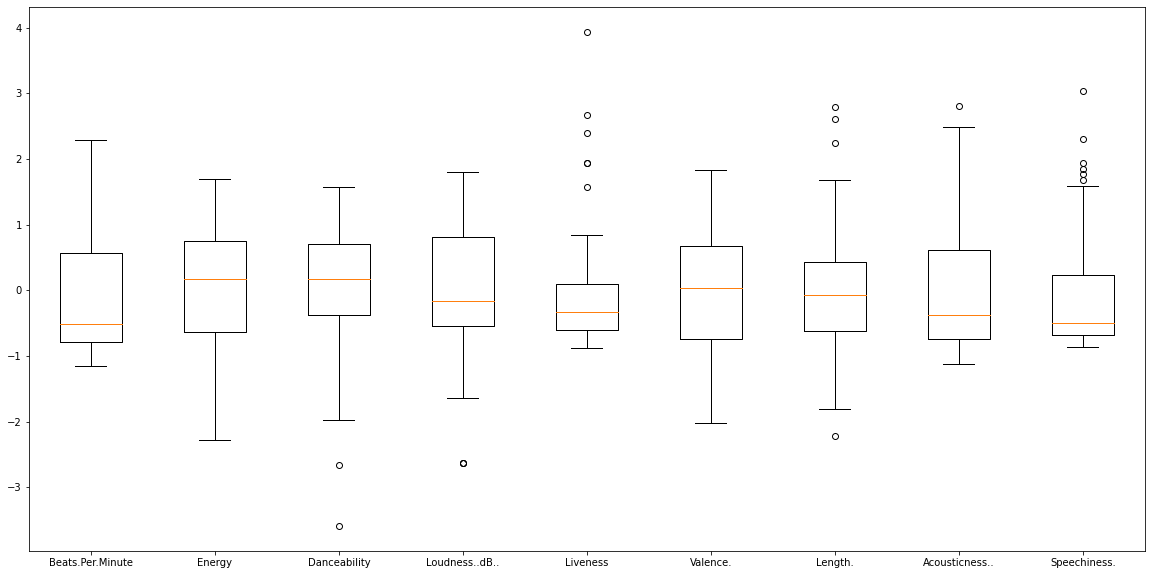

In [93]:
fig = plt.figure(figsize =(20, 10))
plt.boxplot(X_std, labels=df_X.columns)
plt.show()

In [55]:
pca = PCA()
pca.fit(X_std)
evr = pca.explained_variance_ratio_
print(evr)

[0.25020289 0.17532301 0.14144382 0.11281914 0.0998216  0.08138728
 0.0769134  0.03723368 0.02485518]


In [56]:
evr.cumsum()

array([0.25020289, 0.4255259 , 0.56696972, 0.67978886, 0.77961046,
       0.86099774, 0.93791114, 0.97514482, 1.        ])

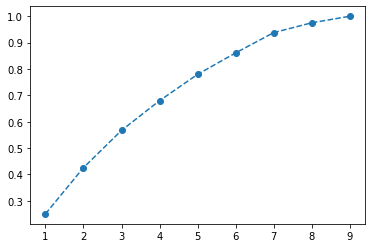

In [131]:
plt.plot(range(1, len(df_X.columns)+1), evr.cumsum(), marker='o', linestyle='--')

plt.show()

In [123]:
pca = PCA(n_components=6)
results = pca.fit_transform(X_std)

In [124]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

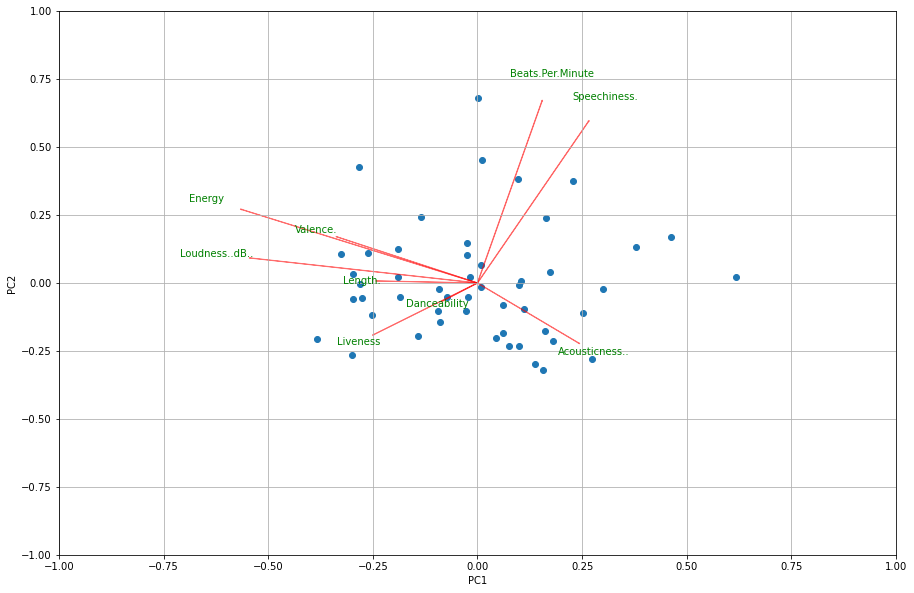

In [125]:
fig = plt.figure(figsize =(15, 10))
biplot(results[:,0:2],np.transpose(pca.components_[0:2, :]), df_X.columns)
plt.show()